In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib

In [3]:
plt.rcParams['axes.labelsize']=14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [6]:
iris=load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
X=iris.data[:,2:]
y=iris.target


In [8]:
tree_clf=DecisionTreeClassifier(max_depth=2)

In [9]:
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

In [10]:
from sklearn.tree import export_graphviz

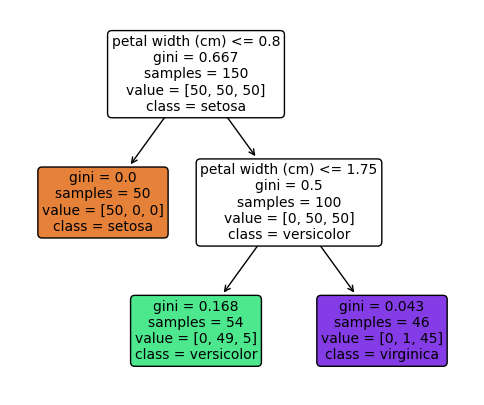

In [11]:
plt.figure(figsize=(6,5))
plot_tree(
    tree_clf,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True 
)
plt.show()

In [12]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [13]:
tree_clf.predict([[5,1.5]])

array([1])

In [14]:
from matplotlib.colors import ListedColormap

In [15]:
def plot_decision_boundary(clf,X,y,axes=[0,7,0,3],iris=True,legend=False,plot_training=True):
    x1s=np.linspace(axes[0],axes[1],100)
    x2s=np.linspace(axes[2],axes[3],100)
    x1,x2=np.meshgrid(x1s,x2s)
    X_new=np.c_[x1.ravel(),x2.ravel()]
    y_pred=clf.predict(X_new).reshape(x1.shape)
    custom_cmap=ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)
    
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1,x2,y_pred,cmap=custom_cmap2,alpha=0.8)
    if plot_training:
        plt.plot(X[:,0][y==0],X[:,1][y==0],"yo", label="Iris-Setosa")
        plt.plot(X[:,0][y==1],X[:,1][y==1],"bs", label="Iris-Versicolor")
        plt.plot(X[:,0][y==2],X[:,1][y==2],"g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
            plt.xlabel("Petal length", fontsize=14)
            plt.ylabel("Petal width", fontsize=14)
    else:
            plt.xlabel(r"$x_1$", fontsize=18)
            plt.ylabel (r"$x_2$", fontsize=18,rotation = 0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)


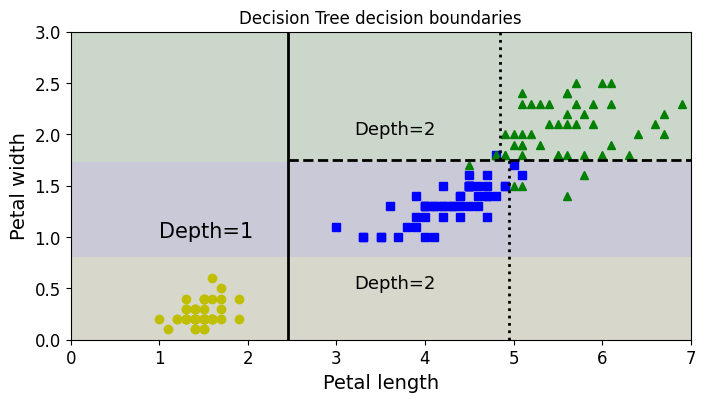

In [16]:
# 绘制决策边界
plt.figure(figsize=(8,4))
plot_decision_boundary(tree_clf, X, y)

# 为了便于理解，这里还绘制了决策边界的切割线（基于前面得到的图片）
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75,1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)

# 绘制决策边界划分出的类别所处深度
plt.text(1, 1.0, "Depth=1", fontsize=15)
plt.text(3.2, 2, "Depth=2", fontsize=13)
plt.text(3.2,0.5, "Depth=2", fontsize=13)
plt.title('Decision Tree decision boundaries')
          
plt.show()


In [17]:
#预剪枝

In [18]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=100,noise=0.25,random_state=43)

In [19]:
tree_clf1=DecisionTreeClassifier(random_state=6)

In [20]:
tree_clf2=DecisionTreeClassifier(min_samples_leaf=5,random_state=16)


In [21]:
tree_clf1.fit(X,y)
tree_clf2.fit(X,y)

DecisionTreeClassifier(min_samples_leaf=5, random_state=16)

Text(0.5, 1.0, 'min_samples_leaf = 5')

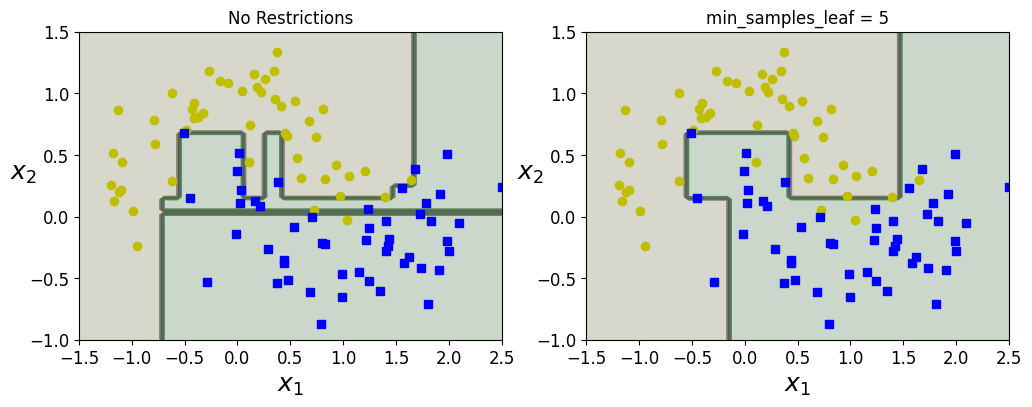

In [22]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plot_decision_boundary(tree_clf1,X,y,axes = [-1.5, 2.5, -1, 1.5], iris = False)
plt.title('No Restrictions')
plt.subplot(122)
plot_decision_boundary(tree_clf2,X,y,axes = [-1.5, 2.5, -1, 1.5], iris = False)
plt.title('min_samples_leaf = 5')

In [23]:
np.random.seed(6)
Xs=np.random.rand(100,2)-0.5
ys=(Xs[:,0]>0).astype(np.float32)*2

angle=np.pi/4

rotation_matrix=np.array([[np.cos(angle),-np.sin(angle)],[np.sin(angle),np.cos(angle)]])
Xsr=Xs.dot(rotation_matrix)

In [24]:
tree_clf_s=DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs,ys)
tree_clf_sr=DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr,ys)

DecisionTreeClassifier(random_state=42)

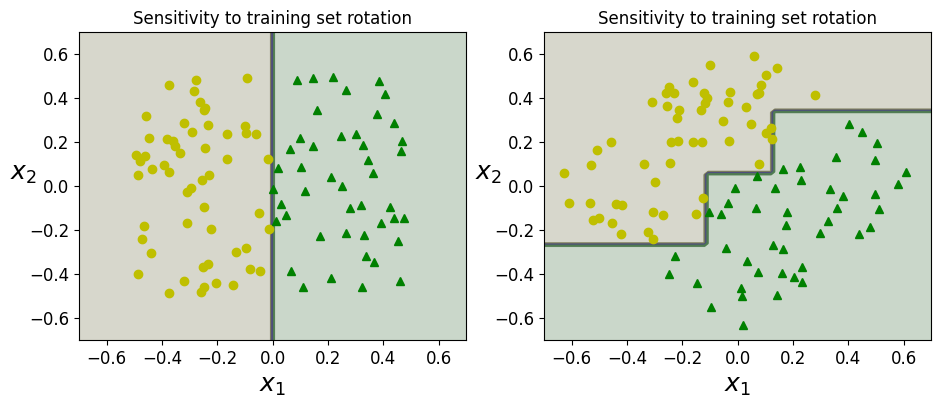

In [25]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_decision_boundary(tree_clf_s,Xs,ys,axes=[-0.7,0.7,-0.7,0.7], iris=False)
plt.title('Sensitivity to training set rotation')

plt.subplot(122)
plot_decision_boundary(tree_clf_sr,Xsr,ys,axes=[-0.7,0.7,-0.7,0.7],iris=False)
plt.title('Sensitivity to training set rotation')
plt.show()


这里说明决策树对数据是相当的敏感的，就单单只是一个翻转四十五度就已经大大改变

from sklearn.tree import DecisionTreeRegressor

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
m=200
X=np.random.rand(m,1)
y=4*(X-0.5)**2+np.random.randn(m,1)/10
tree_reg=DecisionTreeRegressor(max_depth = 2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

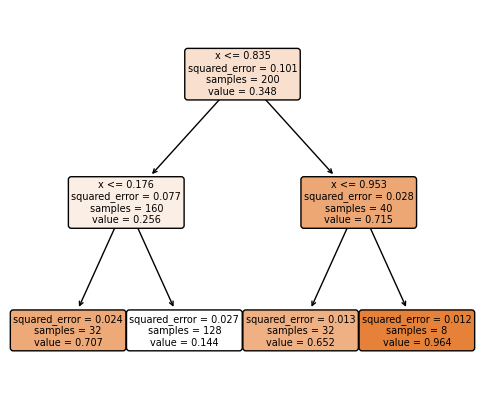

In [28]:
plt.figure(figsize=(6,5))
plot_tree(
    tree_reg,
    feature_names=["x"],
    rounded=True,
    filled=True
)

plt.show()

In [29]:
# 定义预测回归值并绘制的函数
def plot_regression_predictions(tree_reg, X, y, axes=[0,1,-0.2,1],ylabel="$y$"):
    # 获取棋盘坐标（这里的对象是一维坐标）
    # reshape() 函数的 -1 表示对全部数据执行此函数执行后，数据由 (100,) 变为 (100,1)
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    
    # 得到预测值
    y_pred = tree_reg.predict(x1)
    
    # 绘图
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred,"r.-", linewidth=2, label = r"$\hat{y}$")


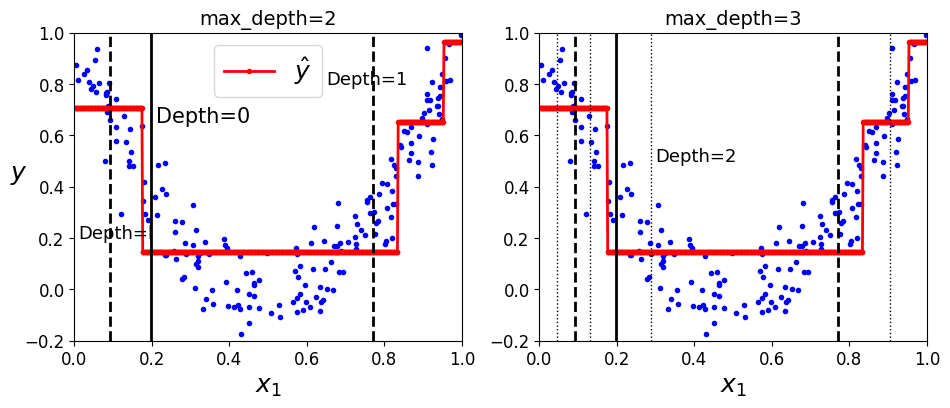

In [30]:
# 开始绘制两个分类器的回归效果
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_regression_predictions(tree_reg, X, y)
for split,style in ((0.1973, "k-"),(0.0917,"k--"),(0.7718,"k--")):
    plt.plot([split,split],[-0.2,1],style,linewidth=2)
plt.text(0.21,0.65,"Depth=0", fontsize=15)
plt.text(0.01,0.2,"Depth=l", fontsize=13)
plt.text(0.65,0.8,"Depth=1", fontsize=13)
plt.legend(loc="upper center",fontsize=18)
plt.title("max_depth=2",fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg,X, y,ylabel=None)
for split,style in ((0.1973,"k-"),(0.0917,"k--"),(0.7718,"k--")):
    plt.plot([split,split],[-0.2,1], style,linewidth=2)
for split in (0.0458,0.1298,0.2873,0.9040):
    plt.plot([split,split],[-0.2,1],"k:",linewidth=1)
plt.text(0.3,0.5,"Depth=2", fontsize=13)
plt.title("max_depth=3",fontsize=14)

plt.show()
